<h1>Python Crypto Assignment 1 : </h1>
<h4>Visualizing Crypto Price Data using Line chart 
While investing in cryptos , it is important for an investor to visualize the  volatility of the price and the price trend using the line chart.</h4>

**Your assignment is to draw a price 
line chart in Python using 
matplotlib
and 
realtime price data for Bitcoin and Ethereum.<br> 
The line chart should show historical data price data and should update itself 
after every few minutes**

In [0]:
import requests
import datetime
import pandas as pd
import natsort
import matplotlib.pyplot as plt
import json

In [0]:
def daily_price_historical(symbol, comparison_symbol, all_data=True, limit=1, aggregate=1, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}&api_key=4f7fe28f17173f66be1168aeace7b4a9d7805a3d947ee07b720078442ed0e668'\
            .format(symbol.upper(), comparison_symbol.upper(),limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    if all_data:
        url += '&allData=true'
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

  
  
def price(symbol, comparison_symbols=['USD'], exchange=''):
    url = 'https://min-api.cryptocompare.com/data/pricemulti?fsyms={}&tsyms={}&api_key=4f7fe28f17173f66be1168aeace7b4a9d7805a3d947ee07b720078442ed0e668'\
            .format(symbol.upper(), ','.join(comparison_symbols).upper())
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()
    return data

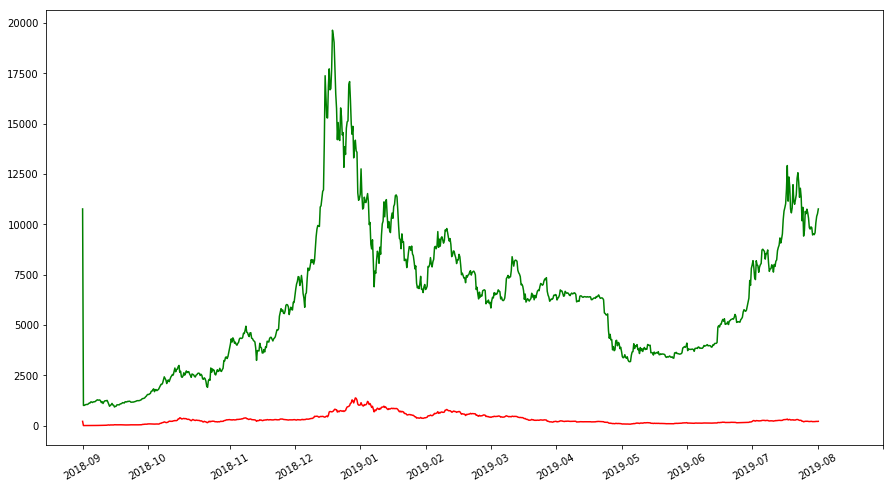

In [67]:

import matplotlib.animation as animation


dfb = daily_price_historical('BTC','USD',all_data=False,limit=900,exchange='coinbase')
dfe = daily_price_historical('ETH','USD',all_data=False,limit=900,exchange='coinbase')



fig = plt.figure( figsize=(15, 8)); 
ax = fig.add_subplot(1, 1, 1)


bitcoinClose = list(dfb.close.values)
etheriumClose = list(dfe.close.values)



def animate(i):

  newData = price('BTC,ETH',exchange='coinbase')
 
  
  bitcoinClose.insert(0,newData['BTC']['USD'])
  etheriumClose.insert(0,newData['ETH']['USD'])
  di = list()
  for i in dfb.timestamp.values:
    di.append(str(i)[:7])

  lpi = natsort.natsorted(list(set(di)))
  ax.clear()
  ax.plot(bitcoinClose, 'g-', label='Bitcoin')
  ax.plot(etheriumClose, 'r-', label='Ethereum')
  ax.set_xticks([0 , 80 , 180, 260, 340, 420 , 500 , 580, 660, 740, 820, 900 , 980 ])
  ax.set_xticklabels(lpi[-12:] , rotation=30) 


ani = animation.FuncAnimation(fig, animate, interval=1000)
fig.show()
  
